In [18]:
# Importaning libraries

import numpy as np 
import pandas as pd
import seaborn as sns
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import minimize

In [19]:
# Parameters taken from fit-gLV-sat-all-Md3 of PM3 fit from pacman paper

uEc_c = 0.033328281132065346 # Ec control growth rate
uEc = 0.022984 # Ec producing bacteriocin growth rate 
uEf = 0.0363320961794854  # Ef growth rate

M11 = 0.03872987667387545# Ec -> Ec Normal One
M22 = 0.0888612551920666 # Ef -> Ef
M12 = 0.0493339883772232 # Ef -> Ec

M21_EntA = 0.0222552935928312 # EcEntA -> Ef              
M21_EntB = 0.0241836699300289 # EcEntB -> Ef              
M21_EntAB = 0.02403055087682115 # EcEntAB -> Ef            

Ks_EntA = 0.00121512703046095 # Half Maximum EntA
Ks_EntB = 0.292047702641047 # Half Maximum EntB
Ks_EntAB = 0.015223212927133401 # Half Maximum EntAB

# LV Monocultures

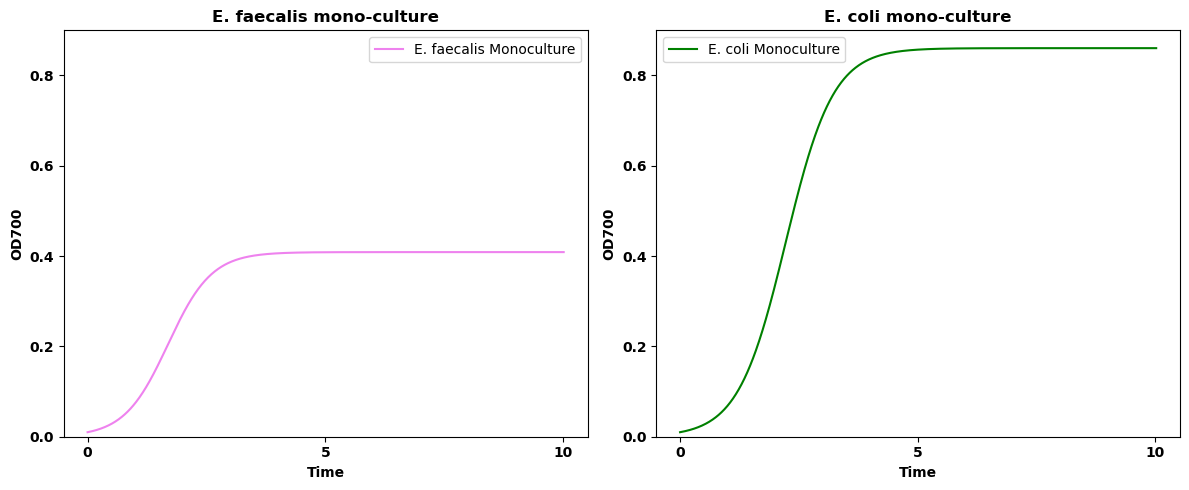

In [20]:
# Monoculture model for E. coli
def monoculture_Ec(X, t):
    x = X
    dx_dt = uEc_c * x - M11 * x**2
    return dx_dt

# Monoculture model for E. faecalis
def monoculture_Ef(Y, t):
    y = Y
    dy_dt = uEf * y - M22 * y**2
    return dy_dt

# Initial populations
X0 = 0.01  # Initial population of E. coli
Y0 = 0.01 # Initial population of E. faecalis

# Over 10 hours
t = np.linspace(0, 601, 1000) 

# Solving the differential equations
X = odeint(monoculture_Ec, X0, t)
Y = odeint(monoculture_Ef, Y0, t)

# Plotting
plt.figure(figsize=(12, 5))

#E.faecalis plot
plt.subplot(1, 2, 1)
plt.plot(t / 60, Y, color='violet', label='E. faecalis Monoculture')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('OD700', fontweight='bold')
plt.title('E. faecalis mono-culture', fontweight='bold')
plt.ylim(0.0, 0.9)
plt.xticks(np.arange(0, 11, 5), fontweight='bold')
plt.yticks(np.arange(0.0, 0.9, 0.2), fontweight='bold') 
plt.legend()


# E.coli plot
plt.subplot(1, 2, 2)
plt.plot(t / 60, X, color='green', label='E. coli Monoculture')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('OD700', fontweight='bold')
plt.title('E. coli mono-culture', fontweight='bold')
plt.ylim(0.0, 0.9)
plt.yticks(np.arange(0.0, 0.9, 0.2), fontweight='bold')
plt.xticks(np.arange(0, 11, 5), fontweight='bold')
plt.legend()


plt.tight_layout()
plt.show()


# Gompertz Growth Functions

### (i) Control Gompertz Model

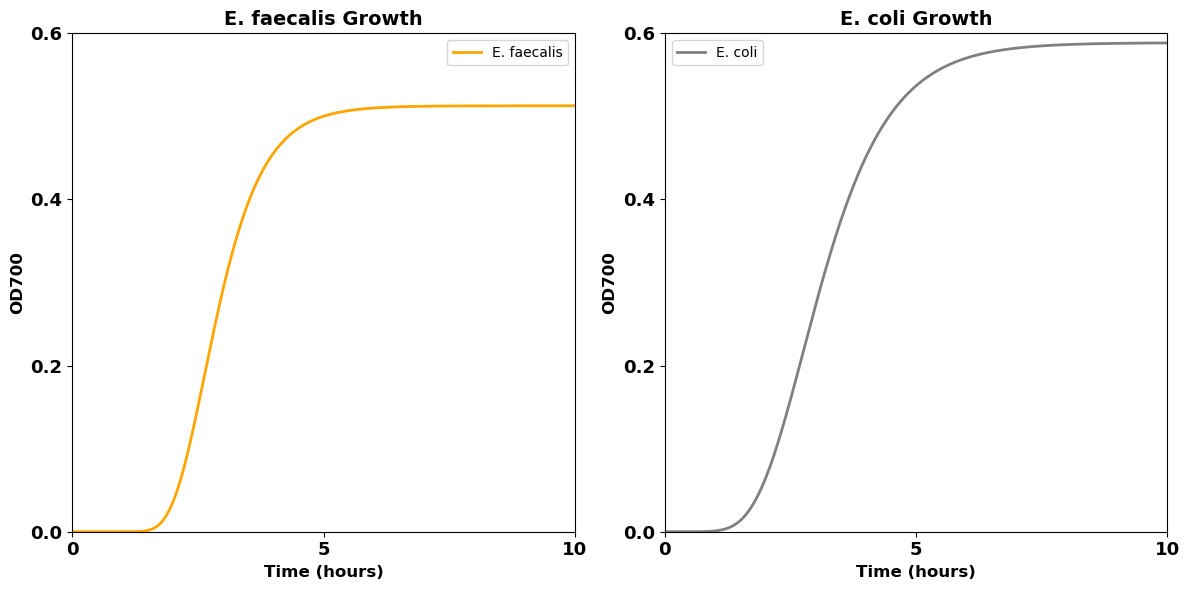

In [21]:
# Defining the Gompertz grwth model function
def gompertz_growth(t, mu, lambda_val, A):
    return A * np.exp(-np.exp((mu * np.e / A) * (lambda_val - t) + 1))

# Setting Parameters 
params_control = {'e_coli': {'mu': 0.00382936289532897,
                     'lambda_val': 108.585032228693,
                     'A': 0.588713650957378,
                     'color': 'grey'},
        'e_faecalis': {'mu': 0.00490140073247591, 
                       'lambda_val': 119.305232790228, 
                       'A': 0.512778515600698, 
                       'color': 'orange'}}


t = np.linspace(0, 601, 1000)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
yticks = np.arange(0, 0.7, 0.2)
xticks = np.arange(0, 11, 5) 

# Ploting E.fae Gompertz growth curve
# Will always stay the same...
y_efaecalis = gompertz_growth(t, params_control['e_faecalis']['mu'],params_control['e_faecalis']['lambda_val'], params_control['e_faecalis']['A'] )
axes[0].plot(t / 60, y_efaecalis, color=params_control['e_faecalis']['color'], label='E. faecalis', linewidth=2)
axes[0].set_title('E. faecalis Growth', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('OD700', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 0.6])
axes[0].set_xlim([0, 10])
axes[0].set_xticks(xticks)
axes[0].set_yticks(yticks)
axes[0].tick_params(labelsize=13)
axes[0].legend()

# Ploting E.coli Gompertz growth curve
y_ecoli = gompertz_growth(t, params_control['e_coli']['mu'],params_control['e_coli']['lambda_val'], params_control['e_coli']['A'])
axes[1].plot(t / 60, y_ecoli, color=params_control['e_coli']['color'], label='E. coli', linewidth=2)
axes[1].set_title('E. coli Growth', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('OD700', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 0.6])
axes[1].set_xlim([0, 10])
axes[1].set_xticks(xticks)
axes[1].set_yticks(yticks)
axes[1].tick_params(labelsize=13)
axes[1].legend()

# bold labels! 
for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [22]:
# Test
y_efaecalis = gompertz_growth(0, params_control['e_coli']['mu'],params_control['e_coli']['lambda_val'], params_control['e_coli']['A'] )
y_efaecalis

5.224401963837969e-09

### (ii) Enterocin Producing Gompertz Model

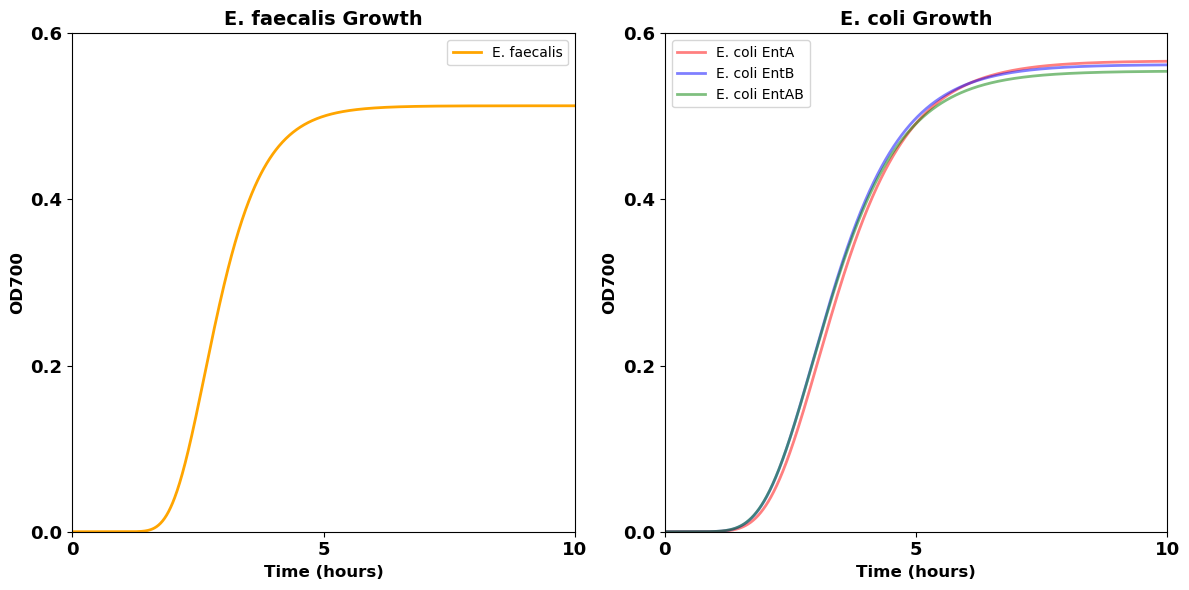

In [23]:
# We have three sets of data for the different Enterocins

# Params for entA
params_entA = {'e_coli': {'mu': 0.00349818734715513,
                     'lambda_val': 124.10209055638,
                     'A': 0.566899068973265,
                     'color': 'grey'},
        'e_faecalis': {'mu': 0.00490140073247591, 
                       'lambda_val': 119.305232790228, 
                       'A': 0.512778515600698, 
                       'color': 'orange'}}

# Params for entB
params_entB = {'e_coli': {'mu': 0.00354304129385296, 
                     'lambda_val': 118.644695445245, 
                     'A': 0.562420456236815, 
                     'color': 'grey'},
        'e_faecalis': {'mu': 0.00490140073247591, 
                       'lambda_val': 119.305232790228, 
                       'A': 0.512778515600698, 
                       'color': 'orange'}}


# Params for entAB
params_entAB = {'e_coli': {'mu': 0.00349298008858163, 
                     'lambda_val': 118.181188740094, 
                     'A': 0.554661046346888, 
                     'color': 'grey'},
        'e_faecalis': {'mu': 0.00490140073247591, 
                       'lambda_val': 119.305232790228, 
                       'A': 0.512778515600698, 
                       'color': 'orange'}}


t = np.linspace(0, 601, 1000)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
yticks = np.arange(0, 0.7, 0.2)
xticks = np.arange(0, 11, 5)  # Adjusted for better granularity

# E.faecalis...
y_efaecalis = gompertz_growth(t, params_entA['e_faecalis']['mu'], params_entA['e_faecalis']['lambda_val'], params_entA['e_faecalis']['A'])
axes[0].plot(t / 60, y_efaecalis, color=params_entA['e_faecalis']['color'], label='E. faecalis', linewidth=2)
axes[0].set_title('E. faecalis Growth', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('OD700', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 0.6])
axes[0].set_xlim([0, 10])
axes[0].set_xticks(xticks)
axes[0].set_yticks(yticks)
axes[0].tick_params(labelsize=13)
axes[0].legend()

# Plotting all three Ents 
colors = ['red', 'blue', 'green']  # Assigning new colors for Enterocin A, B, AB
for params, label, color in zip([params_entA, params_entB, params_entAB], ['EntA', 'EntB', 'EntAB'], colors):
    y_ecoli = gompertz_growth(t, params['e_coli']['mu'], params['e_coli']['lambda_val'], params['e_coli']['A'])
    axes[1].plot(t / 60, y_ecoli, label=f'E. coli {label}', color=color, linewidth=2, linestyle='-', alpha=0.5)

axes[1].set_title('E. coli Growth', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('OD700', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 0.6])
axes[1].set_xlim([0, 10])
axes[1].set_xticks(xticks)
axes[1].set_yticks(yticks)
axes[1].tick_params(labelsize=13)
axes[1].legend()

# Bold Labels!
for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

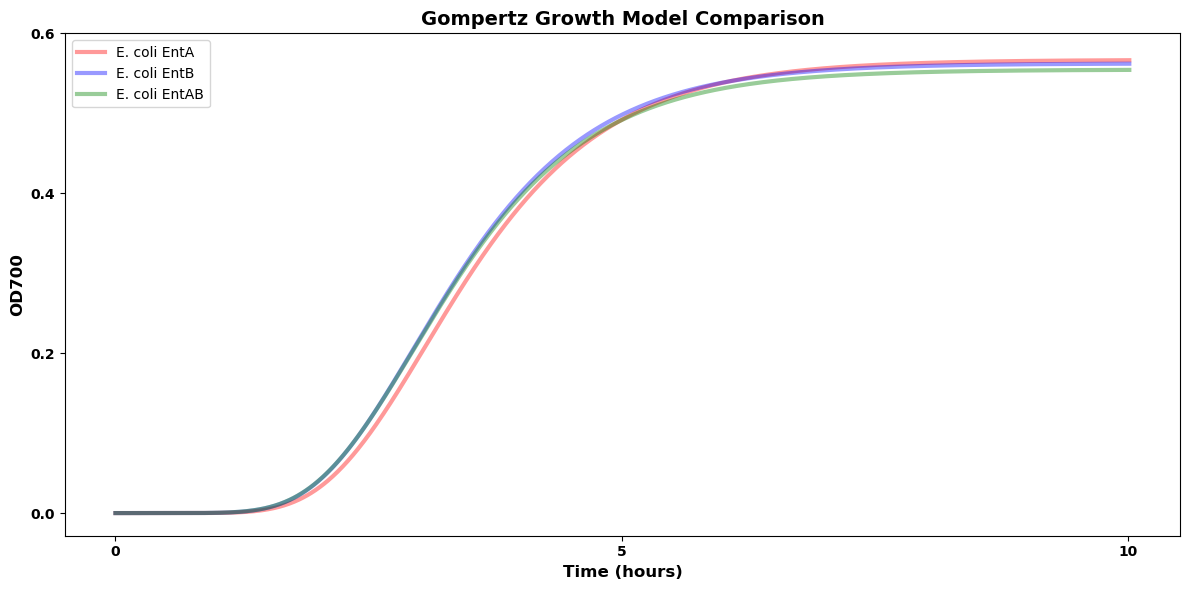

In [24]:
# Only E.coli Gompertz Plot 

t = np.linspace(0, 601, 1000)
plt.figure(figsize=(12, 6))

colors = ['red', 'blue', 'green']  # Colors
labels = ['EntA', 'EntB', 'EntAB']  # Labels

# Params (taken from above)
params = [params_entA, params_entB, params_entAB]

for param, color, label in zip(params, colors, labels):
    y = gompertz_growth(t, param['e_coli']['mu'], param['e_coli']['lambda_val'], param['e_coli']['A'])
    plt.plot(t / 60, y, color=color, label=f'E. coli {label}', linewidth=3, linestyle='-', alpha=0.4)

plt.title('Gompertz Growth Model Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=12, fontweight='bold')
plt.ylabel('OD700', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 11, 5), fontweight='bold')
plt.yticks(np.arange(0, 0.7, 0.2), fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

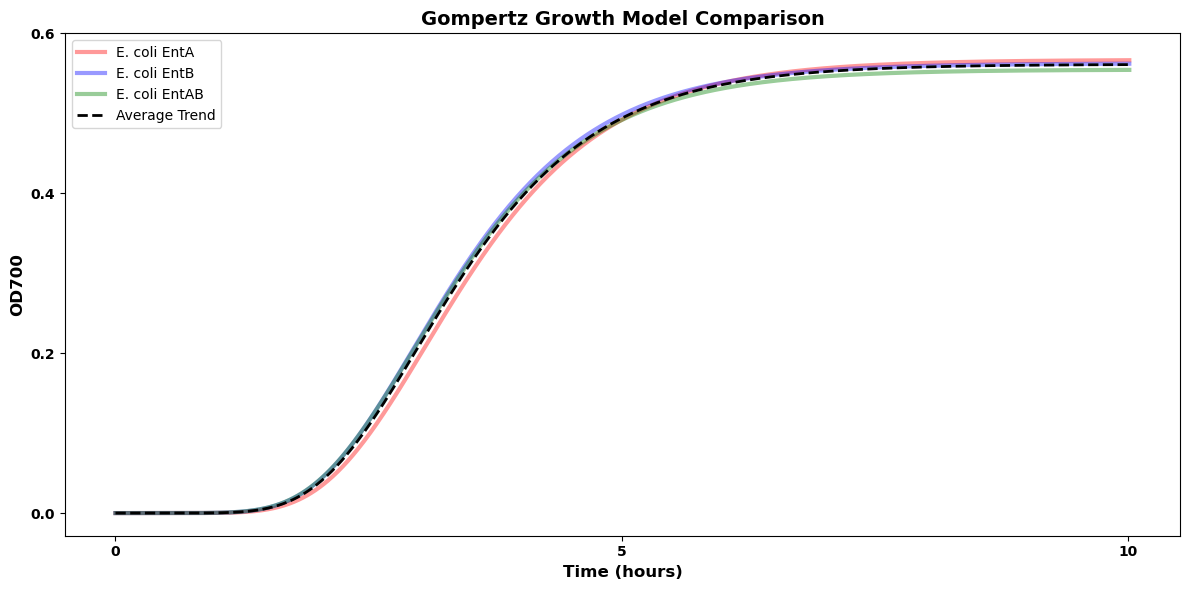

In [25]:
# Finding the line of best fit to average all three Enterocins

t_hours = t / 60  # Converting time to hours

# Making lines for all three Ents & calculating the average from them
y_curves = [gompertz_growth(t, params['e_coli']['mu'], params['e_coli']['lambda_val'], params['e_coli']['A']) 
            for params in [params_entA, params_entB, params_entAB]]
t_hours = t / 60 
y_average = np.mean(y_curves, axis=0) # Calculating the average curve

# Plotting
plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green']
labels = ['EntA', 'EntB', 'EntAB']
for y, color, label, param in zip(y_curves, colors, labels, [params_entA, params_entB, params_entAB]):
    plt.plot(t_hours, y, color=color, label=f'E. coli {label}', linewidth=3, linestyle='-', alpha=0.4)


plt.plot(t_hours, y_average, color='black', label='Average Trend', linewidth=2, linestyle='--')
plt.title('Gompertz Growth Model Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=12, fontweight='bold')
plt.ylabel('OD700', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0, 11, 5), fontweight='bold')
plt.yticks(np.arange(0, 0.7, 0.2), fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


### Overlaying Monoculture and Gompertz

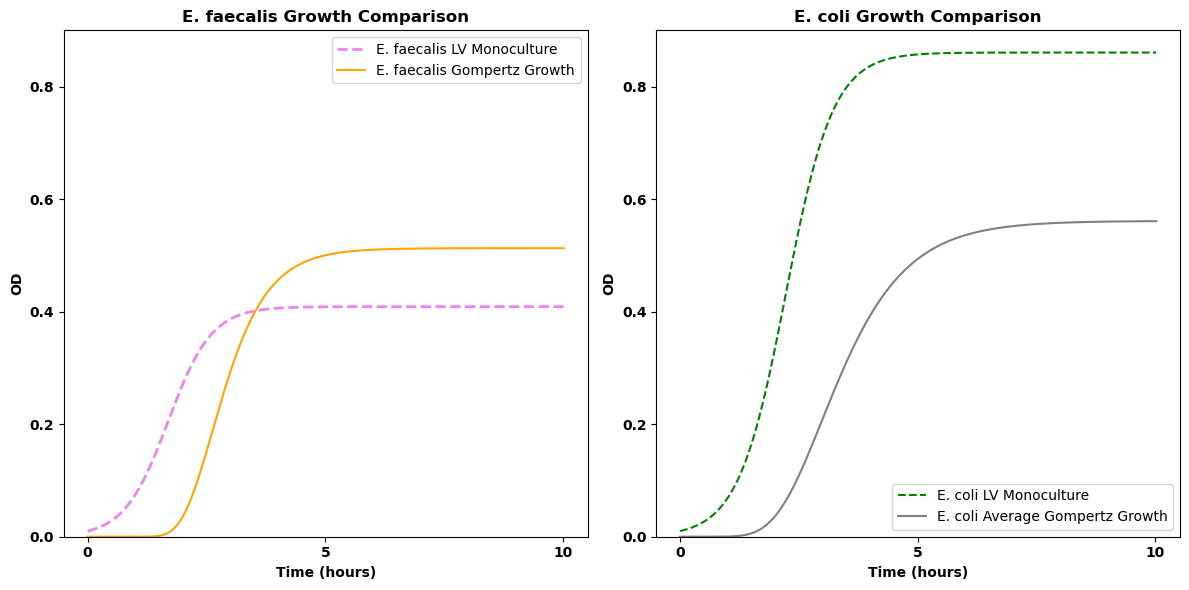

In [28]:
# Overlaying the Mono-culture plot with the Gompertz plot

t = np.linspace(0, 601, 1000)
plt.figure(figsize=(12, 6))

# E. faecalis plot
plt.subplot(1, 2, 1)
plt.plot(t / 60, Y, color='violet', linestyle='--', label='E. faecalis LV Monoculture', linewidth=2, )  # LV model
plt.plot(t / 60, y_efaecalis, color='orange', linestyle='-', label='E. faecalis Gompertz Growth', )  # Gompertz model

plt.title('E. faecalis Growth Comparison', fontweight='bold')
plt.xlabel('Time (hours)', fontweight='bold')
plt.ylabel('OD', fontweight='bold')
plt.ylim(0, 0.9)
plt.xticks(np.arange(0, 11, 5), fontweight='bold')
plt.yticks(np.arange(0, 0.9, 0.2), fontweight='bold')
plt.legend()


# E. coli plot
plt.subplot(1, 2, 2)
plt.plot(t / 60, X, color='green', linestyle='--', label='E. coli LV Monoculture')  # LV model
plt.plot(t / 60, y_average, color='gray', linestyle='-', label='E. coli Average Gompertz Growth')  # Average Gompertz Model

plt.title('E. coli Growth Comparison', fontweight='bold')
plt.xlabel('Time (hours)', fontweight='bold')
plt.ylabel('OD', fontweight='bold')
plt.ylim(0, 0.9) 
plt.yticks(np.arange(0, 0.9, 0.2), fontweight='bold')
plt.xticks(np.arange(0, 11, 5), fontweight='bold')
plt.legend()


plt.tight_layout()
plt.show()